In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import heartpy as hp
import matplotlib.pyplot as plt

## Load normal 

In [95]:
df_normal = pd.read_csv('../data/ptbdb_normal.csv', header=None)

df_normal.dropna()

df_normal.head(10)

sample_rate = 188

## Filrowanie sygnału
Używamy heartpy do filtrowania sygnału

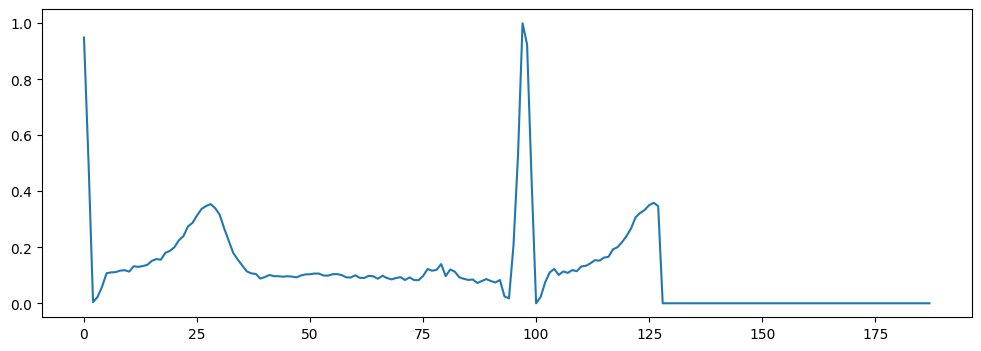

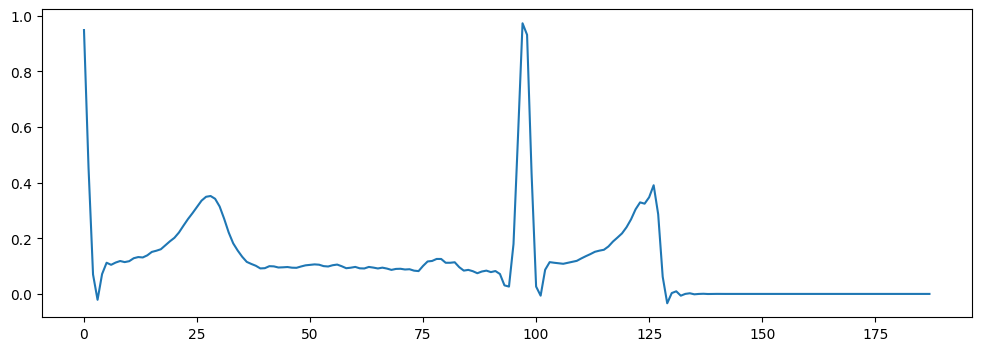

In [96]:
plt.figure(figsize=(12,4))
plt.plot(df_normal.iloc[5])
plt.show()

data_filtered = hp.filter_signal(df_normal.iloc[5], cutoff = 8, sample_rate = 25.0, order = 3, filtertype='lowpass')

plt.figure(figsize=(12,4))
plt.plot(data_filtered)
plt.show()

## Load abnormal

In [97]:
df_abnormal = pd.read_csv('../data/ptbdb_abnormal.csv',header=None)

df_abnormal.dropna()

df_abnormal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.999144,0.774829,0.522260,0.250856,0.000000,0.066781,0.093322,0.144692,0.154110,0.152397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.000000,0.871452,0.678353,0.357262,0.051196,0.000000,0.090707,0.142460,0.138564,0.185309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.000000,0.729630,0.583333,0.350926,0.279630,0.321296,0.267593,0.229630,0.218519,0.203704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.932234,0.810440,0.627595,0.422161,0.263126,0.145910,0.109280,0.088523,0.079976,0.073565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
def get_measures(df):
    df_result = pd.DataFrame()
    
    for i in range(0, len(df)):
        current_row = df.iloc[i]
        try:
            filtered = hp.filter_signal(current_row, cutoff = 8, sample_rate = 25.0, order = 3, filtertype='lowpass')
            w, m = hp.process(hp.scale_data(filtered), len(current_row)) 
            df_processed = pd.DataFrame([m])
            df_result = pd.concat([df_result, df_processed])
        except:
            pass
        
    return df_result

### Wyciągnięcie z danych df_normal informacji na temat bpm, ibi i podobnych za pomocą heartpy 

In [99]:
df_normal_processed = get_measures(df_normal)
df_normal_processed.head(10)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:5334: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,NaN,NaN,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,278.518519,215.425532,210.106383,0.0,420.212766,1.0,1.0,210.106383,0.0,0.0,0.0,NaN,NaN
0,5640.000000,10.638298,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,118.736842,505.319149,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,223.366337,268.617021,247.340426,0.0,494.680851,1.0,1.0,247.340426,0.0,0.0,0.0,NaN,NaN
0,5640.000000,10.638298,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,5640.000000,10.638298,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,245.217391,244.680851,234.042553,0.0,468.085106,1.0,1.0,234.042553,0.0,0.0,0.0,NaN,NaN
0,205.090909,292.553191,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,278.518519,215.425532,210.106383,0.0,420.212766,1.0,1.0,210.106383,0.0,0.0,0.0,NaN,NaN


In [100]:
print(f"Dane zignorowane przez heartpy z df_normal: {df_normal.shape[0] - df_normal_processed.shape[0]}")

Dane zignorowane przez heartpy z df_normal: 25


In [101]:
df_normal_processed.fillna(0, inplace=True)

### Wyciągnięcie z danych df_abnormal informacji na temat bpm, ibi i podobnych za pomocą heartpy 

In [102]:
df_abnormal_processed = get_measures(df_abnormal)
df_abnormal_processed.head(10)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:5334: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,88.818898,675.531915,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,145.548387,412.234043,50.531915,0.0,101.063830,1.0,1.0,50.531915,0.0,0.0,0.0,NaN,NaN
0,103.486239,579.787234,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,129.655172,462.765957,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,105.420561,569.148936,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,120.000000,500.000000,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,168.358209,356.382979,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,317.746479,188.829787,103.723404,0.0,207.446809,1.0,1.0,103.723404,0.0,0.0,0.0,NaN,NaN
0,176.250000,340.425532,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [103]:
print(f"Dane zignorowane przez heartpy z df_abnormal: {df_abnormal.shape[0] - df_abnormal_processed.shape[0]}")

Dane zignorowane przez heartpy z df_abnormal: 259


In [104]:
df_abnormal_processed.fillna(0, inplace=True)

In [105]:
df_normal_processed.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,0.000000,0.000000,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,278.518519,215.425532,210.106383,0.0,420.212766,1.0,1.0,210.106383,0.0,0.0,0.0,0.0,0.0
0,5640.000000,10.638298,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,118.736842,505.319149,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,223.366337,268.617021,247.340426,0.0,494.680851,1.0,1.0,247.340426,0.0,0.0,0.0,0.0,0.0


In [106]:
df_abnormal_processed.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,88.818898,675.531915,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,145.548387,412.234043,50.531915,0.0,101.06383,1.0,1.0,50.531915,0.0,0.0,0.0,0.0,0.0
0,103.486239,579.787234,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,129.655172,462.765957,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,0.000000,0.000000,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


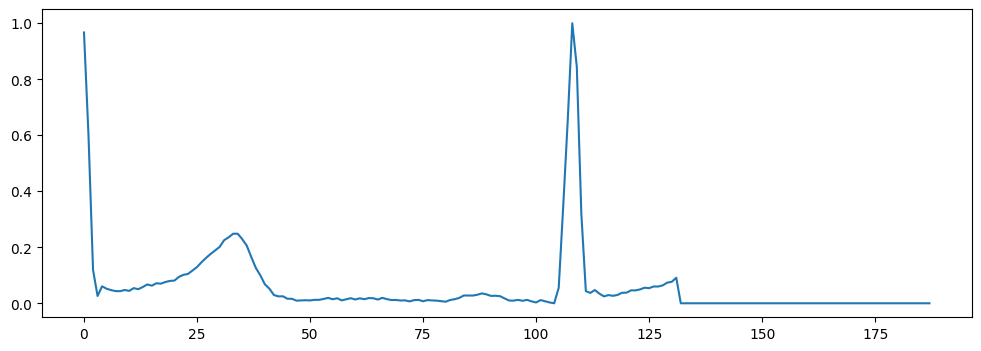

Normal measure.
bpm: 292.987013
ibi: 204.787234
sdnn: 194.148936
sdsd: 0.000000
rmssd: 388.297872
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 194.148936
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1200x400 with 0 Axes>

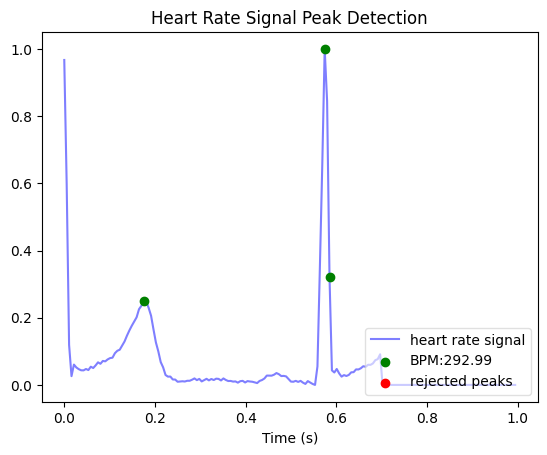

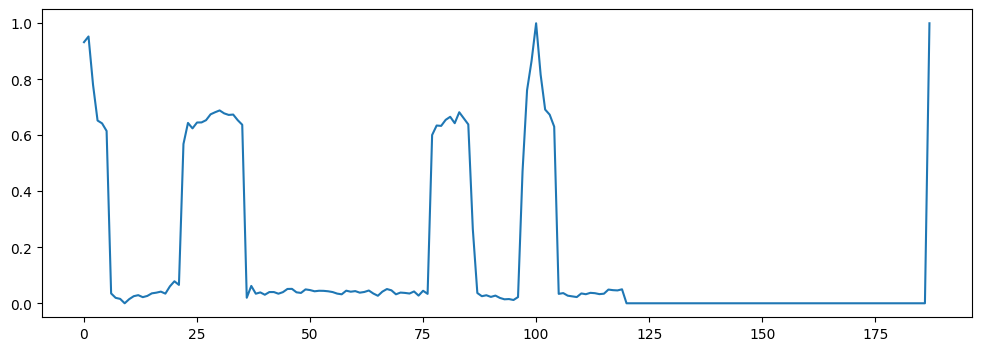

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [107]:
plt.figure(figsize=(12,4))
plt.plot(df_normal.iloc[25])
plt.show()

wd, m = hp.process(df_normal.iloc[25], sample_rate)
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

print("Normal measure.")
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

plt.figure(figsize=(12,4))
plt.plot(df_abnormal.iloc[25])
plt.show()

wd, m = hp.process(df_abnormal.iloc[25], sample_rate)
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

print("Abnormal measure.")
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

### Joining normal and abnormal dataframes



In [125]:
full_df=pd.concat([df_normal_processed, df_abnormal_processed])

full_df = full_df.sample(frac=1)

full_df

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,108.461538,553.191489,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,139.259259,430.851064,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,135.903614,441.489362,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,292.987013,204.787234,125.000000,0.0,250.000000,1.0,1.0,125.000000,0.0,0.0,0.0,0.0,0.0
0,196.173913,305.851064,162.234043,0.0,324.468085,1.0,1.0,162.234043,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,113.939394,526.595745,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,235.000000,255.319149,170.212766,0.0,340.425532,1.0,1.0,170.212766,0.0,0.0,0.0,0.0,0.0
0,121.290323,494.680851,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,0.000000,0.000000,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [127]:
full_df_class = full_df.iloc[:,13:14]  # czy to jest git???
full_df_class

""
0
0
0
0
0
...
0
0
0
0


In [128]:
full_df.iloc[:,0:13]

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,108.461538,553.191489,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,139.259259,430.851064,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,135.903614,441.489362,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,292.987013,204.787234,125.000000,0.0,250.000000,1.0,1.0,125.000000,0.0,0.0,0.0,0.0,0.0
0,196.173913,305.851064,162.234043,0.0,324.468085,1.0,1.0,162.234043,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,113.939394,526.595745,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,235.000000,255.319149,170.212766,0.0,340.425532,1.0,1.0,170.212766,0.0,0.0,0.0,0.0,0.0
0,121.290323,494.680851,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,0.000000,0.000000,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
